In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import coop_post_processing as cpp
import astropy.units as u
from astropy.cosmology import Planck18 as cosmo, z_at_value
import coop_setup_funcs as csf

In [2]:
with fits.open("/mnt/raid-cita/mlokken/data/maglim/maglim_data_wflux_wmag.fits") as mg:
    dat = mg[1].data
    hdr = mg[1].header
    
# with fits.open("/mnt/raid-cita/mlokken/data/maglim/lens_maglim_z1.fits") as mg2:
#     dat_lim = mg2[1].data
#     hdr_lim = mg2[1].header

In [8]:
max(dat['z_mean'][dat['weight']>0])

1.05

In [3]:
hdr

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   56 / length of dimension 1                          
NAXIS2  =             17999117 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   14 / number of table fields                         
TTYPE1  = 'ra      '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'dec     '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'z_mean  '        

# Colors

In [4]:
zmean = dat['z_mean']
gmag = dat['mag_g']
rmag = dat['mag_r']
zmag = dat['mag_z']

In [5]:
# # dbins = [[893, 1493], [1493, 2093], [2093, 2693], [2693,3193]]
# dbins = [[2093,2193]]
# for dbin in dbins:
#     print("Checking dbin {:d}".format(dbin[0]))
#     zlow = z_at_value(cosmo.comoving_distance, dbin[0]*u.Mpc)
#     zhi  = z_at_value(cosmo.comoving_distance, dbin[1]*u.Mpc)
#     inbin  = (zmean>zlow) & (zmean<zhi)
#     zs_bin = zmean[inbin]
#     gr = gmag[inbin]-rmag[inbin]
#     clean   = (gr<4) & (gr>-4)
#     gr = gr[clean]
#     plt.plot(zmean[inbin][clean], gr, 'ro')
#     plt.show()
#     plt.clf()
#     zs_bin = zs_bin[clean]
#     active  = gr<0.6
#     passive = gr>0.6
#     print(len(gr[active]))
#     print(len(gr[passive]))
#     subset_a = np.random.choice(np.arange(len(gr[active])), size=1000)
#     subset_p = np.random.choice(np.arange(len(gr[passive])), size=1000)
#     plt.scatter(zs_bin[active][subset_a], gr[active][subset_a], s=1, color='blue')
#     plt.scatter(zs_bin[passive][subset_p], gr[passive][subset_p], s=1, color='red')
#     plt.ylabel("g-r")
#     plt.xlabel("z")
#     plt.show()
# #         plt.savefig("plots/active_v_passive_z{:.2f}_to_{:.2f}.png".format(zbin[0],zbin[1]))
#     plt.clf()
#     break

In [7]:
z_at_value(cosmo.comoving_distance, 2043*u.Mpc)

<Quantity 0.52899886 redshift>

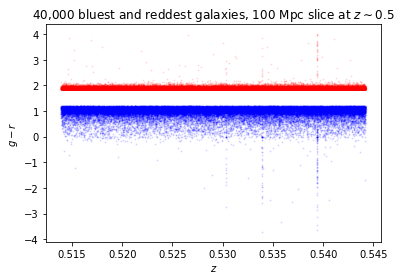

In [9]:
# dbins = [[893, 1493], [1493, 2093], [2093, 2693], [2693,3193]]
dbins = [[1993,2093]]
for dbin in dbins:
    zlow = z_at_value(cosmo.comoving_distance, dbin[0]*u.Mpc)
    zhi  = z_at_value(cosmo.comoving_distance, dbin[1]*u.Mpc)
    inbin  = (zmean>zlow) & (zmean<zhi)
    zs_bin = zmean[inbin]
    gr = gmag[inbin]-rmag[inbin]
    clean   = (gr<4) & (gr>-4)
    gr = gr[clean]
    # take the bluest and reddest
    grsort = np.argsort(gr)
    grsorted = gr[grsort]
    dat_clean_sorted = dat[inbin][clean][grsort]
    ra  = dat_clean_sorted['ra']
    dec = dat_clean_sorted['dec']
    N = 40000
    plt.scatter(dat_clean_sorted['z_mean'][0:N], grsorted[0:N], c='b',s=1, alpha=.1)
    plt.scatter(dat_clean_sorted['z_mean'][-N:], grsorted[-N:], c='r',s=1, alpha=.1)
    plt.title("40,000 bluest and reddest galaxies, 100 Mpc slice at $z\sim0.5$")
    plt.xlabel("$z$")
    plt.ylabel("$g-r$")
    # save these, make a theta,phi list of each
    thetaphi_blues = np.zeros((N,2))
    thetaphi_reds  = np.zeros((N,2))
    blues_theta,blues_phi = csf.DeclRatoThetaPhi(dec[0:N], ra[0:N])
    reds_theta,reds_phi   = csf.DeclRatoThetaPhi(dec[-N:], ra[-N:])
    thetaphi_blues[:,0] = blues_theta
    thetaphi_blues[:,1] = blues_phi
    thetaphi_reds[:,0]  = reds_theta
    thetaphi_reds[:,1]  = reds_phi
    np.savetxt("/mnt/raid-cita/mlokken/data/maglim/thetaphi_bluegals_1993_2093_Mpc.txt", thetaphi_blues)
    np.savetxt("/mnt/raid-cita/mlokken/data/maglim/thetaphi_redgals_1993_2093_Mpc.txt", thetaphi_reds)

In [81]:
smooth = cosmo.arcsec_per_kpc_comoving(z_at_value(cosmo.comoving_distance, 2043*u.Mpc)).to(u.arcmin/u.Mpc)*20*u.Mpc

In [82]:
smooth

<Quantity 33.65390861 arcmin>

In [29]:
zlow, zhi = 1.05, 1.2

In [30]:
mz[in_bin]

array([1.0067828, 1.0446817, 1.0217601, ..., 1.0201999, 1.0417973,
       1.0343823], dtype=float32)

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0., 756927.]),
 array([0.        , 0.05789474, 0.11578947, 0.17368421, 0.23157895,
        0.28947368, 0.34736842, 0.40526316, 0.46315789, 0.52105263,
        0.57894737, 0.63684211, 0.69473684, 0.75263158, 0.81052632,
        0.86842105, 0.92631579, 0.98421053, 1.04210526, 1.1       ]),
 <BarContainer object of 19 artists>)

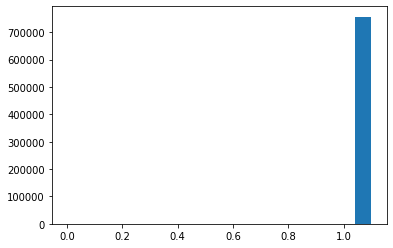

In [31]:
mz = dat['z_mean']
in_bin = (mz > zlow)&(mz<zhi)
plt.hist(mz[in_bin], bins=np.linspace(0,1.1,20))


In [32]:
np.average(dat['weight'][in_bin])

0.0

(array([  41940.,  213363.,  504845.,  903275.,  677517.,  759868.,
         787023.,  662077.,  665146.,  815630.,  898352., 1043440.,
        1096149., 1105176., 1019852., 1033984., 1234858., 1312732.,
        1009644.,  582846.,  218020.,  243510.,  354046.,  334565.,
         212489.,   96924.,   48448.,   26786.,   17447.]),
 array([0.        , 0.06896552, 0.13793103, 0.20689655, 0.27586207,
        0.34482759, 0.4137931 , 0.48275862, 0.55172414, 0.62068966,
        0.68965517, 0.75862069, 0.82758621, 0.89655172, 0.96551724,
        1.03448276, 1.10344828, 1.17241379, 1.24137931, 1.31034483,
        1.37931034, 1.44827586, 1.51724138, 1.5862069 , 1.65517241,
        1.72413793, 1.79310345, 1.86206897, 1.93103448, 2.        ]),
 <BarContainer object of 29 artists>)

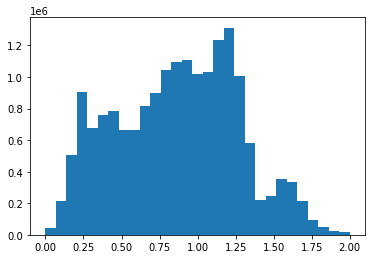

In [107]:
plt.hist(mz, bins=np.linspace(0,2,30))

In [106]:
min(mz[mz>0])

1.0224204e-05

In [93]:
sigma_z = (mz[in_bin]-dat["z_mc"][in_bin])/(1+dat['z_mc'][in_bin])

In [94]:
def sigma_68(arr, axis=None):
    upper, lower = np.percentile(arr, [84.075, 15.825], axis=axis)
    return (upper-lower)/2.
sigma_68(sigma_z)

0.0516235691071488

In [95]:
with fits.open("/mnt/raid-cita/mlokken/buzzard/catalogs/maglim_buzz_Ndensity_1.fits") as bmg:
    bdat = bmg[1].data
    bhdr = bmg[1].header

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
        278666., 488803., 558261., 273740.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <BarContainer object of 19 artists>)

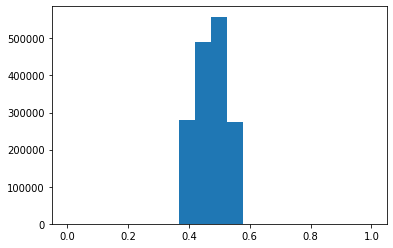

In [96]:
plt.hist(bdat['DNF_ZMEAN'], bins=np.linspace(0,1,20))


(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
        134620.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <BarContainer object of 19 artists>)

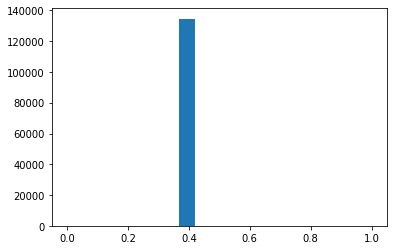

In [97]:
in_bin_b = (bdat['DNF_ZMEAN']>zlow) & (bdat['DNF_ZMEAN']<zhi)
plt.hist(bdat['DNF_ZMEAN'][in_bin_b], bins=np.linspace(0,1,20))


In [98]:
b_sigma_z = (bdat['DNF_ZMEAN'][in_bin_b]-bdat["DNF_ZMC"][in_bin_b])/(1+bdat['DNF_ZMC'][in_bin_b])

In [99]:
sigma_68(b_sigma_z)

0.033567604254281826

(array([179925., 174325., 169236., 168025., 172788., 168667., 156970.,
        143336., 134708., 131520.]),
 array([0.40000018, 0.41500014, 0.43000013, 0.4450001 , 0.46000007,
        0.47500002, 0.49      , 0.505     , 0.52      , 0.5349999 ,
        0.5499999 ], dtype=float32),
 <BarContainer object of 10 artists>)

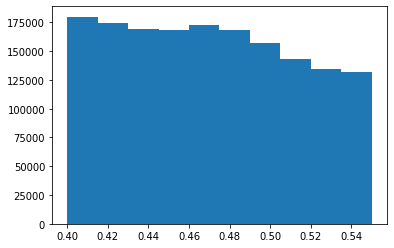

In [31]:
plt.hist(dat['z_mean'])

(array([4.000000e+01, 4.200000e+01, 0.000000e+00, 2.000000e+00,
        6.300000e+02, 2.005000e+03, 6.228000e+03, 1.275722e+06,
        3.051460e+05, 9.685000e+03]),
 array([-1.9690294 , -1.7172195 , -1.4654095 , -1.2135996 , -0.96178967,
        -0.7099797 , -0.45816976, -0.20635983,  0.04545011,  0.29726005,
         0.54907   ], dtype=float32),
 <BarContainer object of 10 artists>)

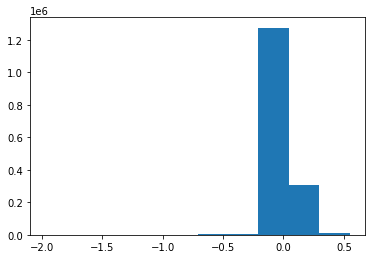

In [32]:
plt.hist(dat['z_mean']-dat['z_mc'])

In [33]:
np.average(dat['z_mean']-dat['z_mc'])

0.010313263

In [37]:
with fits.open("/mnt/raid-cita/mlokken/buzzard/catalogs/maglim_buzz_Ndensity_0.fits") as buzzard:
    hdr = buzzard[1].header
    dat = buzzard[1].data

In [38]:
hdr

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  128 / length of dimension 1                          
NAXIS2  =              2235991 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   27 / number of table fields                         
TTYPE1  = 'MAG_G   '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'MAG_R   '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'MAG_I   '        

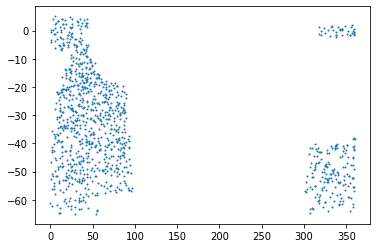

In [39]:
idx = np.random.choice(np.arange(len(dat)), size=1000, replace=False)
plt.scatter(dat['ra'][idx], dat['dec'][idx], s=1)

(array([151541., 199490., 260120., 274596., 243974., 201479., 187463.,
        209294., 241385., 266649.]),
 array([0.20000007, 0.22000006, 0.24000004, 0.26000002, 0.28      ,
        0.29999998, 0.31999997, 0.33999995, 0.35999993, 0.37999991,
        0.39999989]),
 <BarContainer object of 10 artists>)

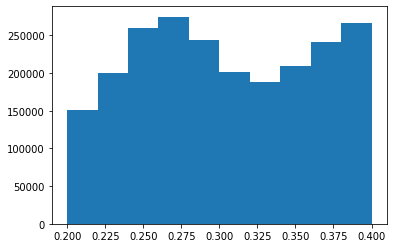

In [40]:
plt.hist(dat['DNF_ZMEAN'])

(array([2.05900e+03, 1.52430e+04, 4.56700e+05, 7.87857e+05, 6.92309e+05,
        2.48298e+05, 3.20080e+04, 1.47900e+03, 3.30000e+01, 5.00000e+00]),
 array([0.004716  , 0.08296742, 0.16121884, 0.23947025, 0.31772167,
        0.39597309, 0.47422451, 0.55247593, 0.63072735, 0.70897877,
        0.78723018]),
 <BarContainer object of 10 artists>)

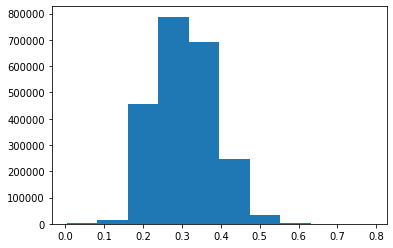

In [41]:
plt.hist(dat['z'])

(array([4.600000e+01, 1.210000e+02, 1.363000e+03, 1.327900e+04,
        1.429440e+05, 1.187591e+06, 8.172980e+05, 6.732500e+04,
        5.797000e+03, 2.270000e+02]),
 array([-0.52297071, -0.43349148, -0.34401225, -0.25453302, -0.1650538 ,
        -0.07557457,  0.01390466,  0.10338389,  0.19286311,  0.28234234,
         0.37182157]),
 <BarContainer object of 10 artists>)

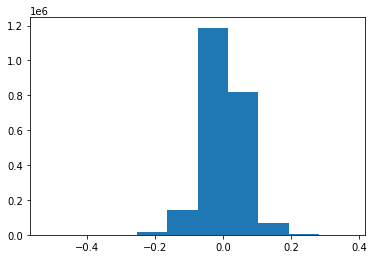

In [42]:
plt.hist(dat['DNF_ZMEAN']-dat['DNF_ZMC'])

(array([9.600000e+01, 1.283000e+03, 3.902500e+04, 5.968070e+05,
        1.379197e+06, 1.953080e+05, 2.232400e+04, 1.878000e+03,
        7.000000e+01, 3.000000e+00]),
 array([-0.36953448, -0.28207622, -0.19461796, -0.10715969, -0.01970143,
         0.06775683,  0.15521509,  0.24267335,  0.33013161,  0.41758987,
         0.50504814]),
 <BarContainer object of 10 artists>)

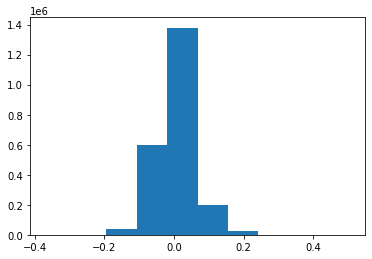

In [43]:
plt.hist(dat['z']-dat['DNF_ZMEAN'])

In [20]:
np.average(dat['DNF_ZMEAN']-dat['DNF_ZMC'])

0.009427147886814466

In [7]:
dat = dat[dat['z_mean']<0.85]
len(dat[dat['mag_i']<23])/len(dat)

0.8505070461418645

(array([0.01211567, 0.10437447, 0.16411767, 0.3688254 , 0.72351651,
        0.85488902, 0.98665337, 1.59702828, 1.63050964, 1.29080776,
        1.11949432, 1.14180203, 1.34358871, 1.42258399, 1.35228856,
        1.36977138, 1.23438539, 1.07428913, 1.07107913, 1.16671812,
        1.29330135, 1.40337941, 1.51355641, 1.54471834, 1.58554986,
        1.70602577, 1.87794877, 1.94856876, 0.09811279, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

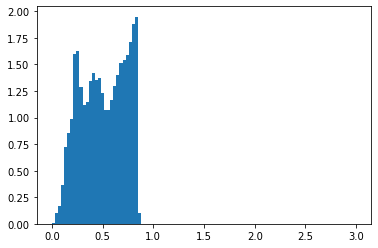

In [8]:
plt.hist(dat['z_mean'], density=True, bins=np.linspace(0,3,100))
# plt.xlim([0,1])

In [19]:
ml_odmap = hp.read_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/odmap_75_z_0pt55_0pt7.fits")
ml_ndmap = hp.read_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/ndmap_25_z_0pt55_0pt7.fits")

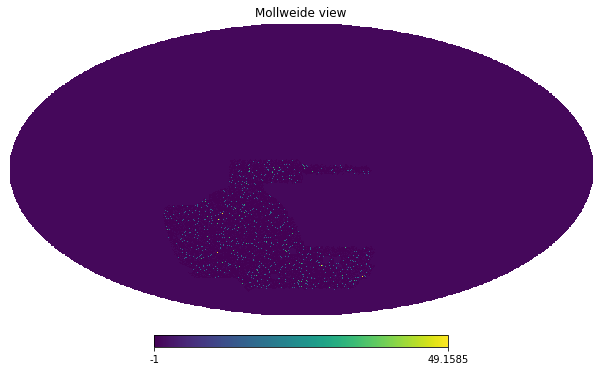

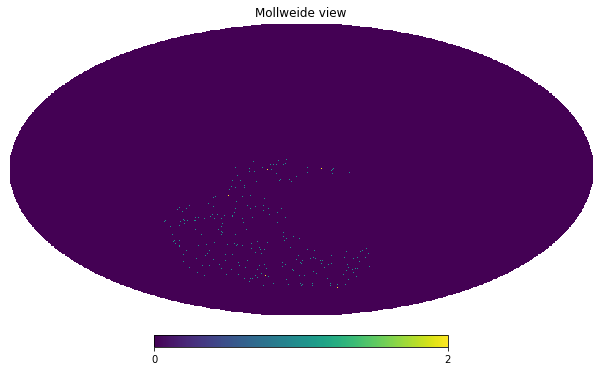

In [20]:
hp.mollview(ml_odmap)
hp.mollview(ml_ndmap)

Check if the overdensity map made of 75% of the data, and the number density map made of the other 25%, look right

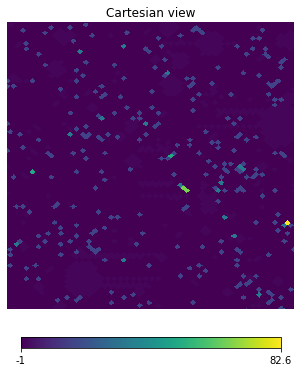

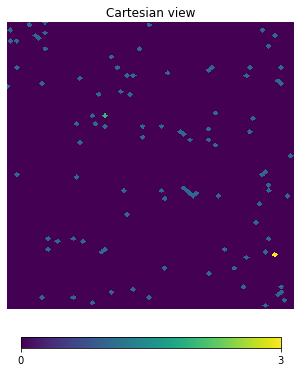

In [21]:
hp.cartview(ml_odmap, lonra=[0,1], latra=[-1,0])
hp.cartview(ml_ndmap, lonra=[0,1], latra=[-1,0])

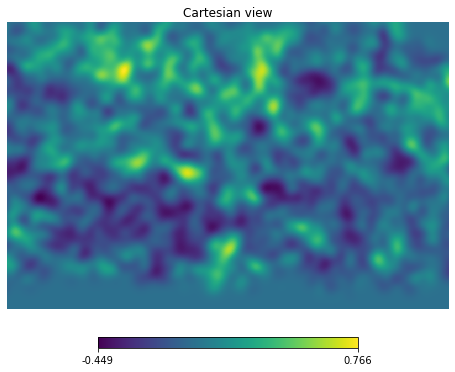

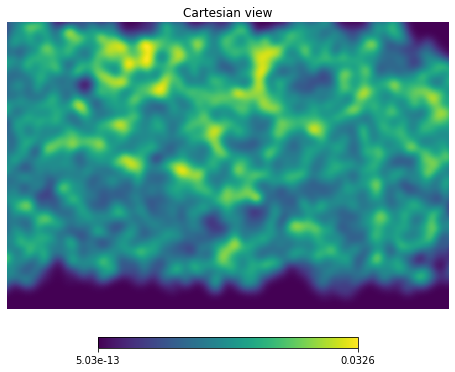

In [12]:
smthmap_od = hp.smoothing(ml_odmap, sigma=1/240.)
smthmap_nd = hp.smoothing(ml_ndmap, sigma=1/240.)
hp.cartview(smthmap_od, lonra=[0,20], latra=[-8,5])
hp.cartview(smthmap_nd, lonra=[0,20], latra=[-8,5])

Check that with successively less data included, the maglim maps degrade as expected

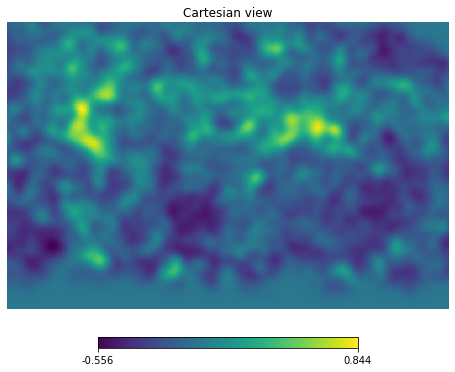

In [9]:
magmap_75 = hp.read_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/odmap75pct_distMpc_843_1600.fits")
smthmap_75 = hp.smoothing(magmap_75, sigma=1/240.)
hp.cartview(smthmap_75, lonra=[0,20], latra=[-8,5])

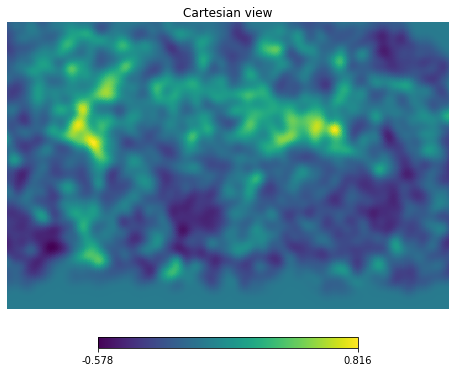

In [10]:
magmap_50 = hp.read_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/odmap50pct_distMpc_843_1600.fits")
smthmap_50 = hp.smoothing(magmap_50, sigma=1/240.)
hp.cartview(smthmap_50, lonra=[0,20], latra=[-8,5])

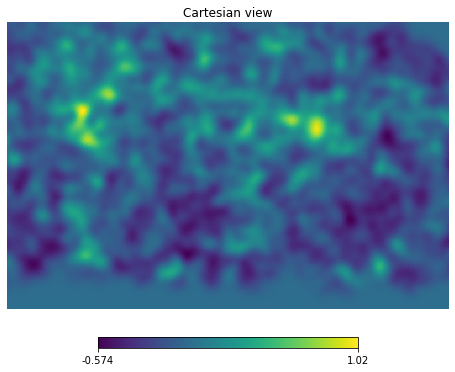

In [11]:
magmap_25 = hp.read_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/odmap25pct_distMpc_843_1600.fits")
smthmap_25 = hp.smoothing(magmap_25, sigma=1/240.)
hp.cartview(smthmap_25, lonra=[0,20], latra=[-8,5])

In [22]:
plot = fits.open("/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/0/ACTxDES_lambdagt20_reg0_bin320pt0_stk.fits")
dat = plot[0].data
plot.close()

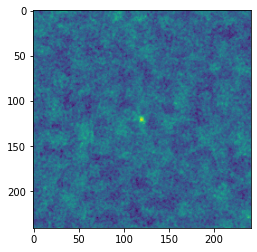

In [24]:
plt.imshow(dat)

In [89]:
path = "/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/"
mprofs_avg = []
stds = []
mprofs = []
rs = []
for m in [0,2,4]:
    mprof = []
    for reg in range(48):
        regpath = path + str(reg) + '/'
        hankel  = np.loadtxt(regpath + "ACTxDES_lambdagt20_reg{:d}_zbin3_20pt0_stk_HankelTransform_m{:d}.txt".format(reg,m))
        Cr = hankel[:,1]
        r  = hankel[:,0]
        mprof.append(Cr)
        if m==0:
            rs.append(r)
    mprof = np.asarray(mprof)
    mprofs.append(mprof)
    mprof_avg = np.average(mprof, axis=0)
    print(mprof_avg.shape)
    mprofs_avg.append(mprof_avg)
    stds.append(np.std(mprof, axis=0))

(120,)
(120,)
(120,)


In [84]:
len(mprofs_avg[2])

120

(-1e-07, 1e-07)

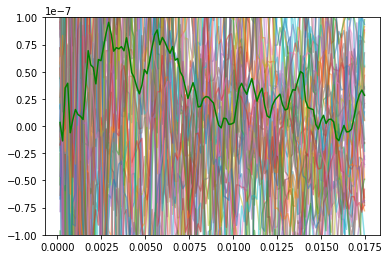

In [93]:
for p in range(len(rs)):
    plt.plot(rs[p], mprofs[2][p], alpha=.5)
plt.plot(rs[0], mprofs_avg[1], color='g')
plt.ylim([-1e-7,1e-7])

<ErrorbarContainer object of 3 artists>

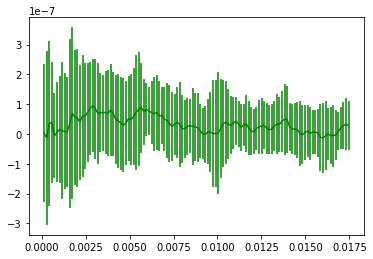

In [94]:
plt.errorbar(rs[0], mprofs_avg[1], yerr=stds[1], color='g')

In [102]:
Cr_m2_binned, r_mpc = cpp.bin_profile(mprofs_avg[1], 40*u.Mpc, 5)

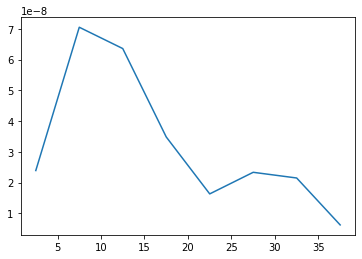

In [103]:
plt.plot(r_mpc, Cr_m2_binned)

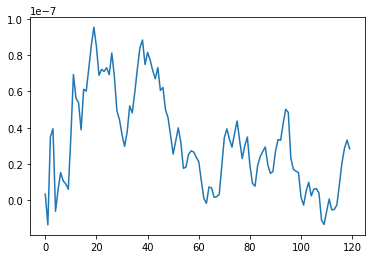

In [46]:
plt.plot(np.arange(120), mprofs[1])